In [1]:
#import numpy, pandas and plotting tools
import numpy as np                   
import pandas as pd                  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import mean, correlate, cov


# Import regression tools & CV tools
%config Completer.use_jedi = False  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold, train_test_split, cross_val_score


In [2]:
#change maximum number of rows and columns
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

In [3]:
#import data
df = pd.read_csv('ipf_2023.csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              367 non-null    object 
 1   Sex               367 non-null    object 
 2   Event             367 non-null    object 
 3   Equipment         367 non-null    object 
 4   Age               367 non-null    float64
 5   AgeClass          367 non-null    object 
 6   BirthYearClass    367 non-null    object 
 7   Division          367 non-null    object 
 8   BodyweightKg      367 non-null    float64
 9   WeightClassKg     367 non-null    object 
 10  Squat1Kg          367 non-null    float64
 11  Squat2Kg          364 non-null    float64
 12  Squat3Kg          362 non-null    float64
 13  Squat4Kg          0 non-null      float64
 14  Best3SquatKg      367 non-null    float64
 15  Bench1Kg          367 non-null    float64
 16  Bench2Kg          366 non-null    float64
 1

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Mara Hames,F,SBD,Raw,25.0,24-34,24-39,Open,75.10,76,175.0,182.5,-190.0,NaN,182.5,95.0,100.0,-105.0,NaN,100.0,177.5,185.0,190.0,NaN,190.0,472.5,17,459.88,448.80,394.77,93.69,Yes,Germany,NaN,IPF,IPF,2023-06-11,Malta,NaN,St. Julians,World Classic Powerlifting Championships
1,Monica de La Torre,F,SBD,Raw,27.5,24-34,24-39,Open,51.85,52,125.0,132.5,135.0,NaN,135.0,90.0,92.5,95.0,NaN,95.0,150.0,160.0,-165.0,NaN,160.0,390.0,11,476.33,487.27,431.97,98.72,Yes,Mexico,NaN,IPF,IPF,2023-06-11,Malta,NaN,St. Julians,World Classic Powerlifting Championships
2,Martina Malzová,F,SBD,Raw,27.5,24-34,24-39,Open,51.65,52,122.5,127.5,132.5,NaN,132.5,65.0,-67.5,67.5,NaN,67.5,165.0,172.5,-177.5,NaN,172.5,372.5,13,456.18,466.80,413.88,94.61,Yes,Czechia,NaN,IPF,IPF,2023-06-11,Malta,NaN,St. Julians,World Classic Powerlifting Championships
3,Miriam Amri,F,SBD,Raw,27.5,24-34,24-39,Open,56.70,57,147.5,157.5,-162.5,NaN,157.5,77.5,82.5,-85.0,NaN,82.5,182.5,192.5,-197.5,NaN,192.5,432.5,9,497.23,503.95,445.65,101.85,Yes,Netherlands,NaN,IPF,IPF,2023-06-11,Malta,NaN,St. Julians,World Classic Powerlifting Championships
4,Mayara Soares,F,SBD,Raw,30.5,24-34,24-39,Open,46.70,47,117.5,125.0,-130.0,NaN,125.0,62.5,65.0,67.5,NaN,67.5,122.5,130.0,135.0,NaN,135.0,327.5,11,431.25,442.49,394.65,91.36,Yes,Brazil,NaN,IPF,IPF,2023-06-11,Malta,NaN,St. Julians,World Classic Powerlifting Championships


In [4]:
#clean data
df = df[df['Sex'] == 'F']
df = df[df['Best3SquatKg'] > 0] 
df = df[df['Best3BenchKg'] > 0]
df = df[df['Best3DeadliftKg'] > 0]
df = df[df['MeetName'] == 'World Classic Powerlifting Championships']

df = df[['Name','Sex', 'Age', 'AgeClass', 'BodyweightKg','WeightClassKg','Best3SquatKg','Best3BenchKg', 'Best3DeadliftKg', 'TotalKg', 'Place','Dots','Wilks']]
df.head(5)

,Name,Sex,Age,AgeClass,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks
0,Mara Hames,F,25.0,24-34,75.10,76,182.5,100.0,190.0,472.5,17,459.88,448.80
1,Monica de La Torre,F,27.5,24-34,51.85,52,135.0,95.0,160.0,390.0,11,476.33,487.27
2,Martina Malzová,F,27.5,24-34,51.65,52,132.5,67.5,172.5,372.5,13,456.18,466.80
3,Miriam Amri,F,27.5,24-34,56.70,57,157.5,82.5,192.5,432.5,9,497.23,503.95
4,Mayara Soares,F,30.5,24-34,46.70,47,125.0,67.5,135.0,327.5,11,431.25,442.49


Name               Zoé Coinne
Sex                         F
Age                      75.0
AgeClass                75-79
BodyweightKg           152.75
WeightClassKg             84+
Best3SquatKg            285.5
Best3BenchKg            160.0
Best3DeadliftKg         268.0
TotalKg                 693.5
Place                       9
Dots                   600.18
Wilks                   604.7
dtype: object
Name               Adejoke Adetayo
Sex                              F
Age                           20.5
AgeClass                     20-23
BodyweightKg                 45.35
WeightClassKg                   47
Best3SquatKg                  82.5
Best3BenchKg                  30.0
Best3DeadliftKg              105.0
TotalKg                      217.5
Place                            1
Dots                        279.82
Wilks                       287.18
dtype: object


Text(0, 0.5, 'Total in Kg')

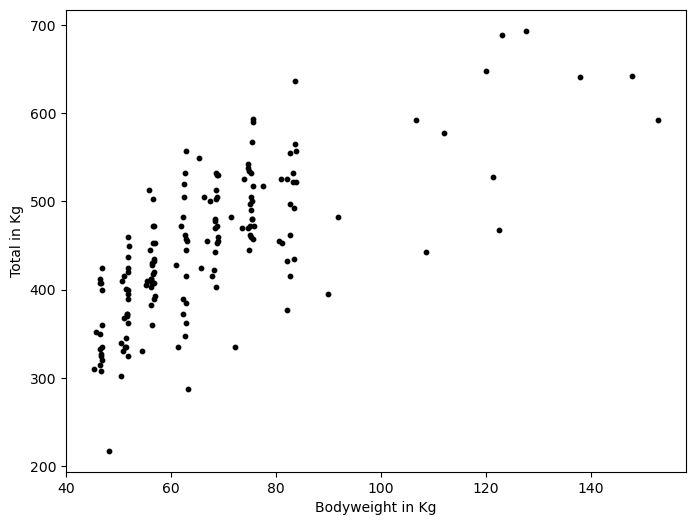

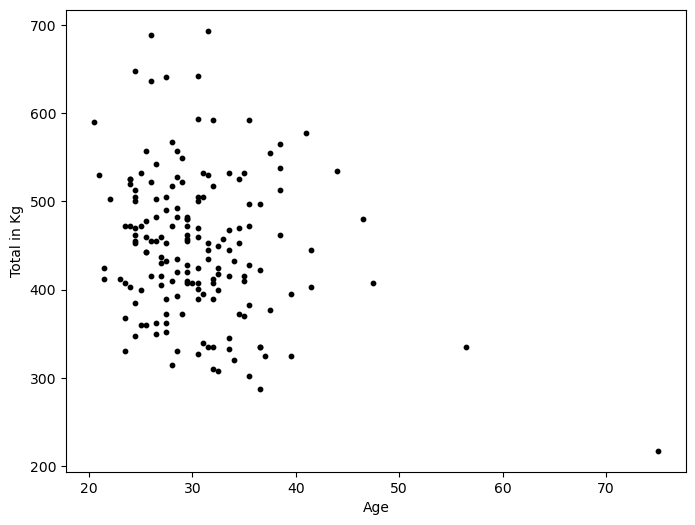

In [5]:
#sanity checking the variables under study
MaxValues = df.max()
print(MaxValues)
MinValues = df.min()
print(MinValues)

#scatter plot (bodyweight)
plt.figure(figsize=(8, 6)) 
plt.scatter(df['BodyweightKg'], df['TotalKg'], color='black', s=10) 
plt.xlabel('Bodyweight in Kg')
plt.ylabel('Total in Kg')

#scatter plot (age)
plt.figure(figsize=(8, 6)) 
plt.scatter(df['Age'], df['TotalKg'], color='black', s=10) 
plt.xlabel('Age')
plt.ylabel('Total in Kg')

In [6]:
#setting features and labels
features = []
labels = []
X = df[['BodyweightKg', 'Age']]
y = df['TotalKg']


feature = X.to_numpy()
features.append(feature)
label = y.to_numpy()
labels.append(label)

#X = np.array(features).reshape(-1,1) 
#y = np.array(labels).reshape(-1,)

In [7]:
#split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print(X_test.shape)
print(X_train.shape)

(34, 2)
(132, 2)


In [8]:
#collect errors

stats = []

In [10]:
#run linear regression with n-fold cv

cv = KFold(n_splits=len(X_train), shuffle=True, random_state = 1)

model = LinearRegression().fit(X_train,y_train)

scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
y_train_pred = model.predict(X_train)

scores = -scores
mean_error = np.mean(scores)

train_error = mean_squared_error(y_train, y_train_pred)

stats.append([1, train_error, mean_error])

print("w1, w2 = ", model.coef_)   # print the learnt w1
print("w0 = ",model.intercept_) # print the learnt w0
print("Training error (MSE): ", train_error)
print("K-fold cross validation error (MSE): ",mean_error)

w1, w2 =  [ 2.94402473 -3.23210488]
w0 =  348.27037323806826
Training error (MSE):  2888.5007201075905
K-fold cross validation error (MSE):  3041.635351186651


NameError: name 'x' is not defined

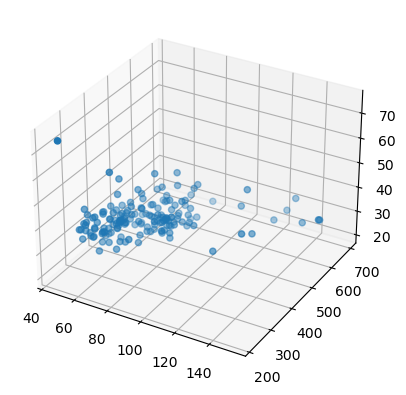

In [10]:
#Plotting the regression EI TOIMI

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the independent variables
x1 = df['BodyweightKg']
x2 = df['Age']
y = df['TotalKg']

# Add the data points
ax.scatter(x1, y, x2)

# Add the regression plane
coef = model.intercept_
plane = np.array([[(coef[0]*i + coef[1]*j + coef[2]) for i in x] for j in y])
ax.plot_surface(x1, y, plane, alpha=0.5)

# Add labels and title
ax.set_xlabel('Bodyweight in Kg')
ax.set_ylabel('Total in Kg')
ax.set_zlabel('Age')
plt.title('Multiple Linear Regression')

# Show the plot
plt.show()

In [11]:
#run polynomial regression with n-fold cv
degrees = [2,3,4,5]
cv_poly = KFold(n_splits=len(X_train), shuffle=True, random_state = 1)

for i in range(len(degrees)):
    print("Degree: ", degrees[i])
    
    poly = PolynomialFeatures(degree=degrees[i])
    X_poly = poly.fit_transform(X_train)
    poly_model = LinearRegression().fit(X_poly,y_train)
    
    y_poly_train_pred = poly_model.predict(X_poly)
    poly_train_error = mean_squared_error(y_poly_train_pred, y_train)
    
    scores = cross_val_score(poly_model, X_poly, y_train, cv=cv_poly, scoring='neg_mean_squared_error')
    scores = -scores
    mean_error = np.mean(scores)
    
    stats.append([degrees[i], poly_train_error, mean_error])
    
    #print("Coefficients = ", poly_model.coef_)  
    #print("w0 = ",poly_model.intercept_) 
    print("Training error (MSE): ", poly_train_error)
    print("K-fold cross validation error (MSE): ",mean_error)

    #plot the regression
    #X_fit = np.linspace(40, 160)  
    #plt.plot(X_fit, poly_model.predict(poly.transform(X_fit.reshape(-1, 1))), label="Model", color="red")  
    #plt.scatter(X, y, color="black", s=10, label="datapoints")    
    #plt.xlabel('Bodyweigth in Kg')    
    #plt.ylabel('Total in Kg')
    #plt.legend(loc="best")   
    #plt.title('Polynomial degree = {}\n Mean absolute error = {:.5}'.format(degrees[i], mean_error)) 
    #plt.show()  

Degree:  2
Training error (MSE):  2608.926076296545
K-fold cross validation error (MSE):  2844.9799587889866
Degree:  3
Training error (MSE):  2500.2194579827697
K-fold cross validation error (MSE):  5103.1780720578745
Degree:  4
Training error (MSE):  2352.9115094929434
K-fold cross validation error (MSE):  4014.8981806401384
Degree:  5
Training error (MSE):  2083.7621537119753
K-fold cross validation error (MSE):  5057309.629280991


In [12]:
#print stats
table = pd.DataFrame(stats, columns = ['polynomial degree', 'training error', 'validation error'])
pd.options.display.float_format = '{:.1f}'.format
print(" Loss of linear and polynomial regressions:")
print(table.to_string(index=False))

 Loss of linear and polynomial regressions:
 polynomial degree  training error  validation error
                 1          2888.5            3041.6
                 1          2888.5            3041.6
                 2          2608.9            2845.0
                 3          2500.2            5103.2
                 4          2352.9            4014.9
                 5          2083.8         5057309.6


In [13]:
#feature engineering: switching ageclass from object to float (with upper limit of class as the value)
df['AgeClass'] = df['AgeClass'].astype('string')

new_AgeClass = df['AgeClass'].str.split(pat='-', n=1, expand=True)
df.insert(4, "AgeClassUpperLimit", new_AgeClass[1], True)


In [14]:
df['WeightClassKg'] = df['WeightClassKg'].astype('string')
df['WeightClassKg'].info()
df.head(16)

<class 'pandas.core.series.Series'>
Index: 166 entries, 0 to 366
Series name: WeightClassKg
Non-Null Count  Dtype 
--------------  ----- 
166 non-null    string
dtypes: string(1)
memory usage: 2.6 KB


,Name,Sex,Age,AgeClass,AgeClassUpperLimit,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks
0,Mara Hames,F,25.0,24-34,34,75.1,76,182.5,100.0,190.0,472.5,17,459.9,448.8
1,Monica de La Torre,F,27.5,24-34,34,51.9,52,135.0,95.0,160.0,390.0,11,476.3,487.3
2,Martina Malzová,F,27.5,24-34,34,51.6,52,132.5,67.5,172.5,372.5,13,456.2,466.8
3,Miriam Amri,F,27.5,24-34,34,56.7,57,157.5,82.5,192.5,432.5,9,497.2,503.9
4,Mayara Soares,F,30.5,24-34,34,46.7,47,125.0,67.5,135.0,327.5,11,431.2,442.5
5,Kim Grech,F,31.5,24-34,34,72.2,76,125.0,67.5,142.5,335.0,25,333.0,326.4
6,Lyudmila Bichok,F,32.0,24-34,34,75.7,76,190.0,117.5,210.0,517.5,9,501.6,489.1
7,Catherine Portelli,F,33.5,24-34,34,122.5,84+,170.0,77.5,220.0,467.5,11,373.0,372.5
8,Zahra Al Ammar,F,33.5,24-34,34,62.9,63,150.0,75.0,190.0,415.0,12,446.8,446.2
9,Lorna Cachia,F,34.5,24-34,34,62.2,63,147.5,65.0,160.0,372.5,15,403.6,403.7


In [17]:
#feature engineering: replace 84+ class with bodyweight

df['WeightClassKg'] = np.where(df['WeightClassKg'] == '84+', df['BodyweightKg'], df['WeightClassKg'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 0 to 366
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                166 non-null    object 
 1   Sex                 166 non-null    object 
 2   Age                 166 non-null    float64
 3   AgeClass            166 non-null    string 
 4   AgeClassUpperLimit  166 non-null    string 
 5   AgeClassUpperLimit  166 non-null    string 
 6   BodyweightKg        166 non-null    float64
 7   WeightClassKg       166 non-null    object 
 8   TotalKg             166 non-null    float64
 9   Place               166 non-null    object 
 10  Dots                166 non-null    float64
 11  Wilks               166 non-null    float64
dtypes: float64(5), object(4), string(3)
memory usage: 16.9+ KB


In [19]:
#change variables to float

df['AgeClassUpperLimit'] = df['AgeClassUpperLimit'].astype('float')
df['WeightClassKg'] = df['WeightClassKg'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 0 to 366
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                166 non-null    object 
 1   Sex                 166 non-null    object 
 2   Age                 166 non-null    float64
 3   AgeClass            166 non-null    string 
 4   AgeClassUpperLimit  166 non-null    float64
 5   AgeClassUpperLimit  166 non-null    float64
 6   BodyweightKg        166 non-null    float64
 7   WeightClassKg       166 non-null    float64
 8   TotalKg             166 non-null    float64
 9   Place               166 non-null    object 
 10  Dots                166 non-null    float64
 11  Wilks               166 non-null    float64
dtypes: float64(8), object(3), string(1)
memory usage: 16.9+ KB


In [15]:
df = df[['Age', 'BodyweightKg', 'TotalKg']]

pd.options.display.float_format = '{:.3f}'.format
df.corr(method='pearson', min_periods=1, numeric_only=False)


,Age,BodyweightKg,TotalKg
Age,1.000,-0.026,-0.235
BodyweightKg,-0.026,1.000,0.718
TotalKg,-0.235,0.718,1.000


In [21]:
#collect ridge results
ridge_stats = []


In [22]:
#set ridge features 
ridge_features = []
X_ridge = df[['Age', 'AgeClassUpperLimit', 'BodyweightKg', 'WeightClassKg']]

ridge_feature = X_ridge.to_numpy()
ridge_features.append(ridge_feature)


In [23]:
#Split data
X_ridge_train, X_ridge_test, y_ridge_train, y_ridge_test = train_test_split(X_ridge, y, test_size=0.20, random_state=0)

print(X_ridge_test.shape)
print(X_ridge_train.shape)

(34, 5)
(132, 5)


In [24]:
#run basic ridge regression, find best lambda
#fix: instead of printing values, collect them in list and print a table
alpha= list(range(0, 1000, 50))
min_error = 10000
best_i = 0
for i in alpha:
    model = Ridge(alpha = i)
    cv = KFold(n_splits=len(X_ridge_train), shuffle=True, random_state = 1)

    scores = cross_val_score(model, X_ridge_train, y_ridge_train, cv=cv, scoring='neg_mean_squared_error')
    scores = -scores
    mean_error = np.mean(scores)
    
    model = model.fit(X_ridge_train, y_ridge_train)
    
    y_ridge_train_pred = model.predict(X_ridge_train)
    ridge_train_error = mean_squared_error(y_ridge_train_pred, y_ridge_train)

    
    if mean_error < min_error:
        min_error = mean_error
        best_i = i
        best_ridge_train_error = ridge_train_error
        
ridge_stats.append([1, best_ridge_train_error, min_error])

print('Smallest validation error with ridge regression with lambda ', best_i)
print("Training error (MSE): ", best_ridge_train_error)
print("K-fold cross validation error (MSE): ",min_error)


Smallest validation error with ridge regression with lambda  950
Training error (MSE):  2853.0472267333867
K-fold cross validation error (MSE):  3012.299879291743


In [25]:
#run polynomial ridge regression with degrees 2 to 4
degrees = [2,3,4]
cv_ridge_poly = KFold(n_splits=len(X_ridge_train), shuffle=True, random_state = 1)
for i in range(len(degrees)):
    print("Degree: ", degrees[i])
    
    ridge_poly_model = KernelRidge(alpha=best_i,kernel='poly', degree = degrees[i])
    
    ridge_poly_model.fit(X_ridge_train, y_ridge_train)
    y_ridge_poly_predict = ridge_poly_model.predict(X_ridge_train)
    poly_ridge_train_error = mean_squared_error(y_ridge_poly_predict, y_ridge_train)
    
    scores = cross_val_score(ridge_poly_model, X_ridge_train, y_ridge_train, cv=cv_ridge_poly, scoring='neg_mean_squared_error')
    scores = -scores
    
    mean_error = np.mean(scores)
    
    ridge_stats.append([degrees[i], poly_ridge_train_error, mean_error])
    
    
    print("Training error (MSE): ", poly_ridge_train_error)
    print("K-fold cross validation error (MSE): ",mean_error)

Degree:  2
Training error (MSE):  2575.588786473036
K-fold cross validation error (MSE):  3191.731438584822
Degree:  3
Training error (MSE):  2224.809843221178
K-fold cross validation error (MSE):  4437.300860267841
Degree:  4
Training error (MSE):  1547.615283173142
K-fold cross validation error (MSE):  548326.8831763284


In [27]:
#print ridge stats
ridge_table = pd.DataFrame(ridge_stats, columns = ['polynomial degree', 'training error', 'validation error'])
pd.options.display.float_format = '{:.1f}'.format
print(" Loss of ridge regressions:")
print(ridge_table.to_string(index=False))


 Loss of ridge regressions:
 polynomial degree  training error  validation error
                 1          2853.0            3012.3
                 2          2575.6            3191.7
                 3          2224.8            4437.3
                 4          1547.6          548326.9


In [28]:
#test model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
poly_model = LinearRegression().fit(X_poly,y_train)

y_poly_pred = poly_model.predict(X_poly_test)

test_error = mean_absolute_error(y_test, y_poly_pred)
print("Test error (MAE):", test_error)

Test error (MAE): 40.64061349335424
